## Import modul for visualisation

In [1]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

#### import df

In [2]:
df = pd.read_csv('data/scrap_BI.csv')
pd.set_option('display.max_rows', None)
df

,title,year_of_release,duration_in_minutes,genre,tomato_score,pop_score
0,Shawshank_Redemption,1994,142,Drama,91,98
1,Godfather,1972,175,"Crime, Drama",97,98
2,Dark_Knight,2008,152,"Action, Crime, Drama",Not found,Not found
3,Godfather:_Part_II,1974,202,"Crime, Drama",Not found,Not found
4,12_Angry_Men,1957,96,"Crime, Drama",Not found,Not found
5,Lord_of_the_Rings:_Return_of_the_King,2003,201,"Action, Adventure, Drama",Not found,Not found
6,Pulp_Fiction,1994,154,"Crime, Drama",92,96
7,Schindler's_List,1993,195,"Biography, Drama, History",Not found,Not found
8,Inception,2010,148,"Action, Adventure, Sci-Fi",87,91
9,Fight_Club,1999,139,Drama,79,96


In [3]:
df = df.sort_values(axis = 0, ascending = False, by= ['tomato_score', 'pop_score'])

In [4]:
df['year_of_release']= df['year_of_release'].replace("I) (", "0")

In [5]:
df["year_of_release"] = df['year_of_release'].astype(int)

## Le nombre de film par genre

In [6]:
# count= []

# for i in ['Drama', 'Mystery', 'Romance', 'Action', 'Adventure', 'Sci-Fi', 'Biography',\
#           'Crime', 'Comedy', 'Family', 'Fantasy', 'War',\
#           'Animation', 'Horror', 'Mystery', 'Thriller', 'Sport',\
#           'History', 'Western', 'Film-Noir', 'Music']:
#     count.append(df[df['genre'].str.contains(i)].count())

C:\Users\Simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


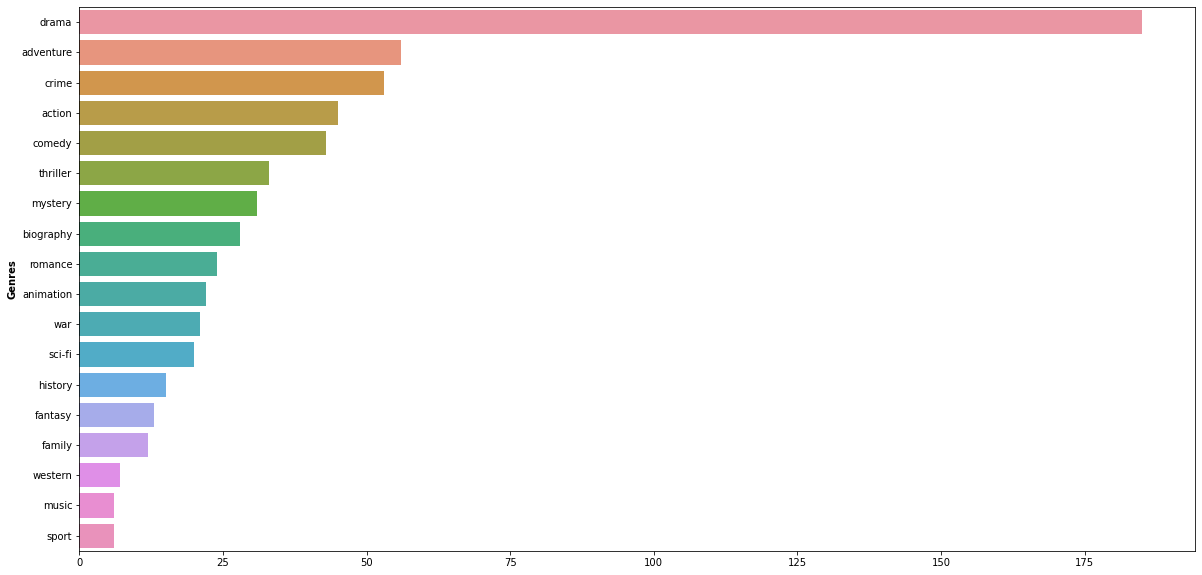

In [7]:
#code Zohra

from collections import Counter
genre = []
for x in df['genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())

count = Counter(genre)
count = count.most_common()[:18]

x,y = map(list,zip(*count)) #?

fig,axs = plt.subplots(figsize=(20,10))
g = sns.barplot(y,x)
g.set_ylabel("Genres", weight = "bold")
plt.show()

## Distribution des scores

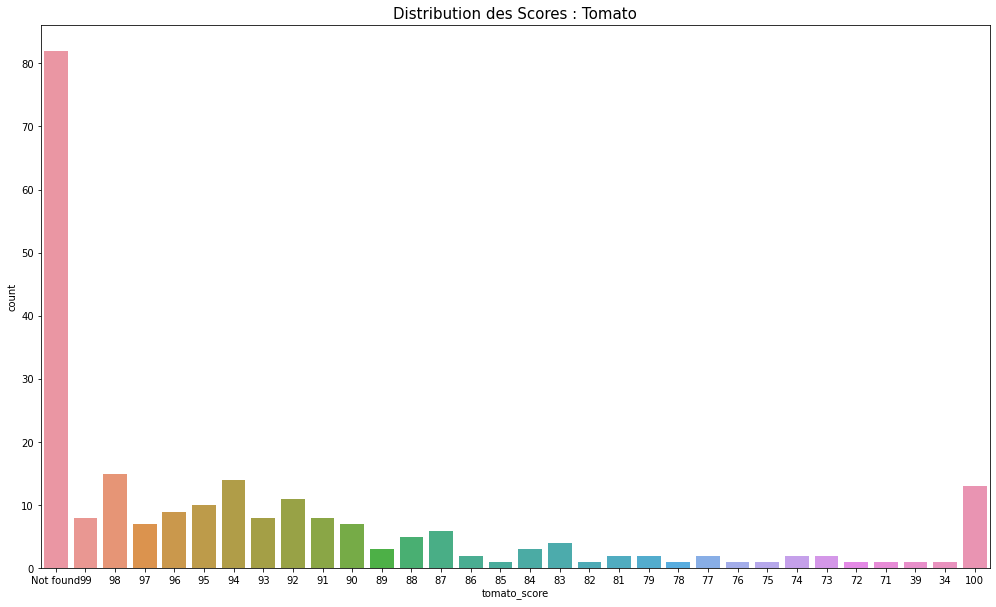

In [8]:
plt.figure(figsize= (17,10))
sns.countplot(x='tomato_score', data= df)
plt.title('Distribution des Scores : Tomato', fontsize=15)
plt.show()

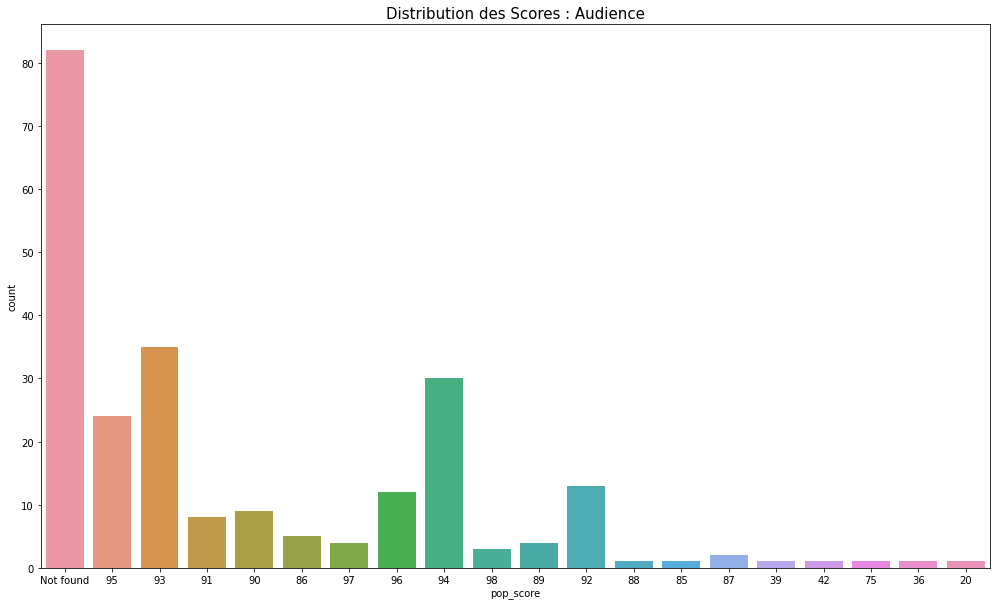

In [9]:
plt.figure(figsize= (17,10))
sns.countplot(x='pop_score', data= df)
plt.title('Distribution des Scores : Audience', fontsize=15)
plt.show()

## Nombres de films (groupés par année)

In [10]:
df['year_of_release'] = df['year_of_release'].sort_values(ascending=False)

In [23]:
bins = [1921,1950 ,1970, 1980,1990,2000,2010, 2021]
df['binned'] = pd.cut(df['year_of_release'], bins=bins)

<ipython-input-24-f07eaf66b052>:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(df['binned'].unique(), loc=(1,0), labels=labels)


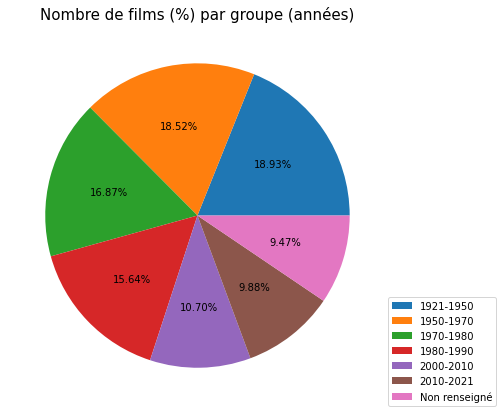

In [24]:
# pie chart
plt.figure(figsize=(10,7))
labels = "1921-1950","1950-1970","1970-1980","1980-1990","2000-2010","2010-2021","Non renseigné"

plt.pie(df['binned'].value_counts(), autopct='%0.02f%%')
plt.legend(df['binned'].unique(), loc=(1,0), labels=labels)
plt.title('Nombre de films (%) par groupe (années)', fontsize=15)
plt.show()